In [1]:
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
sessions <- read_csv("data/sessions.csv")
players <- read_csv("data/players.csv")


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
sessions|> summarise(average_original_start_time=mean(original_start_time,na.rm=TRUE), average_original_end_time=mean(original_end_time,na.rm=TRUE))|>round(2)
players |> summarise(average_played_hours=mean(played_hours, na.rm=TRUE), average_Age=mean(Age,na.rm=TRUE))|>round(2)


average_original_start_time,average_original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


average_played_hours,average_Age
<dbl>,<dbl>
5.85,21.14


(1) Data Description

The Data Description of sessions.csv  
1.Number of Observation:1535  
2.Summary Statistics:  
-Average of original_satrt_time:1.719201e+12  
-Average of original_end_time:1.719196e+12  
3.NUmber of Variables:5  
4.Name, Type of Variables, and What the Variables Mean:  
-hashedEmail(character):Hashed version of player email used as an anonymous ID  
-start_time(character):Session start timestamp  
-end_time(character):Session end timestamp  
-original_start_time(double):Session start timestamp in Unix epoch milliseconds (UTC)  
-original_end_time(double):Session end timestamp in Unix epoch milliseconds (UTC)  

The Data Descripton of players.csv  
1.Number of Observation:196  
2.Summary Statistics:  
-Average of played_hours:5.85  
-Average of Age:21.14  
3.Number of Variables:7  
4.Name, Type of Variables, and What the Variables Mean:  
-experience(character):Gaming experience levels(e.g., Pro/Veteran/Amateur/Regular/Beginner)  
-subscribe(logical):The players subscribed or not  
-hashedEmail(character):Hashed version of player email used as an anonymous ID  
-played_hours(double):The time players played the game  
-name(character):The real name of the players  
-gender(character):Gender of the Players  
-Age(double):The age of the players  

-Issue  
Age contains missing value(NA)  
players.csv is collected per-players, whereas sessions.csv is collected per-sessions, so they have differences between the number of obserbations.  
-This data was collected by a research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a MineCraft serverLinks to an external site., and players' actions are recorded as they navigate through the world.

(2)Questions

This assignment tackle Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types and can players’ experience level, total played hours, gender, age predict whether they subscribe to the game-related newsletter? The players.csv dataset contains demographic imformation. Discribing the subscription rate by experience and gender and the proportion of subscription by the experience

(3) Exploratory Data Analysis and Visualization

In [16]:
sessions_data <- read_csv("data/sessions.csv")
players_data <- read_csv("data/players.csv")

sessions_data
players_data

sessions|> summarise(average_original_start_time=mean(original_start_time,na.rm=TRUE), average_original_end_time=mean(original_end_time,na.rm=TRUE))|>round(2)
players |> summarise(average_played_hours=mean(played_hours, na.rm=TRUE), average_Age=mean(Age,na.rm=TRUE))|>round(2)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


average_original_start_time,average_original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


average_played_hours,average_Age
<dbl>,<dbl>
5.85,21.14


| Variable | Average |
|:-------|:------|
|Average of Original Start Time|1.719201e+12|
|Average of Original End Time|1.719196e+12|
|Average Played Hours|5.85|
|Average Age|21.14|

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


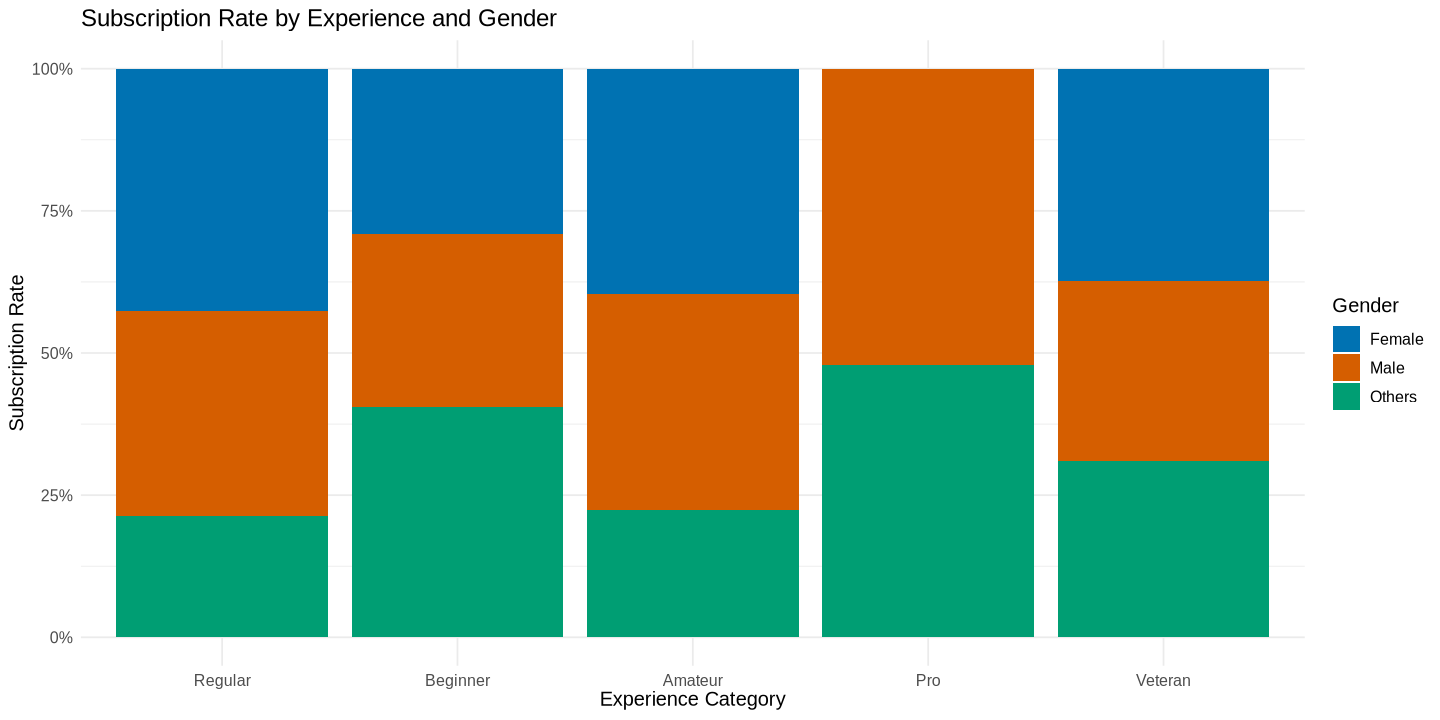

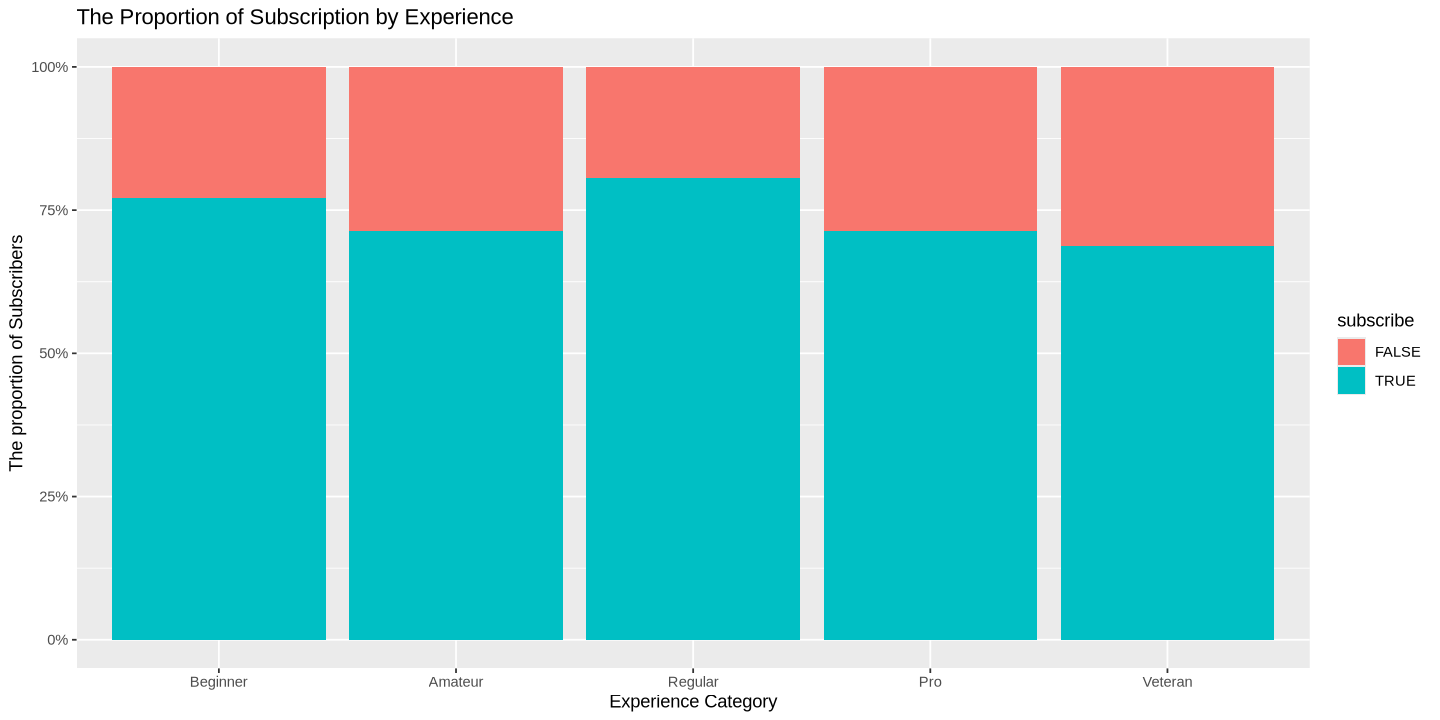

In [17]:
library(dplyr)
library(ggplot2)
library(scales)
library(forcats)

colour_colection <- c("#0072B2", "#D55E00", "#009E73")

players_data <- players_data |>
mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")))

gender_mutate <- players_data |>
  mutate(gender_simple = recode(
    gender,
    "Male" = "Male",
    "Female" = "Female",
    "Agender" = "Others",
    "Non-binary" = "Others",
    "Prefer not to say" = "Others",
    "Two-Spirited" = "Others",
    "Other" = "Others"
  ))

subscription_rate_bar <- gender_mutate |> 
  group_by(experience, gender_simple) |> 
  summarise(subscribe_rate = mean(subscribe), .groups = "drop") |> 
  ggplot(aes(
    x = fct_reorder(experience, subscribe_rate, .desc = TRUE), 
    y = subscribe_rate, 
    fill = gender_simple
  )) +
  geom_col(position = "fill") +
  scale_fill_manual(values = colour_colection) +
  scale_y_continuous(labels = percent_format()) +
  labs(
    title = "Subscription Rate by Experience and Gender",
    x = "Experience Category",
    y = "Subscription Rate",
    fill="Gender"
  ) +
  theme_minimal() +
  theme(text = element_text(size = 12))

options(repr.plot.width = 12, repr.plot.height = 6)

subscription_rate_bar


subscribe_number_bar <- players_data|>
    group_by(experience, subscribe)|>
    summarise(count=n())|>
    ggplot(aes(x=experience, y=count, fill=subscribe))+
    geom_col(position="fill")+
    scale_y_continuous(labels = percent_format())+
    labs(title= "The Proportion of Subscription by Experience",
        x="Experience Category",
        y="The proportion of Subscribers")
subscribe_number_bar

This first bar graph illustrates the percentage of subscription rate of three different genders: male, female, and others within each experience category. Female players have the highest subscription rate, 40%, 39%, and 37.5% in regular, amateur, and veteran categories, respectively. It suggests that these three categories of females tend to subscribe to newsletters compared to other categories of females. 51% of the pro category’s subscribers are male players, and 49% are others. This suggests that the professional male players highly subscribe to it.  While approximately 45% of players who subscribe to the newsletter are others. Just beginner players have the highest rate, which other players subscribe to. In the veteran category, three types of gender equal proportion, 33%, subscribe to the newsletter.

The second bar graph illustrates the percentage of subscribers and non-subscribers by experience. Approximately 76% of players in the regular category subscribed to the newsletter, and the proportion is the highest compared to other categories.

Therefore, the female players in the regular category are the most likely to subscribe to it, because more than 75% of regular players subscribed, and 40% of subscribers in the regular category are female.


(4) Methods and Plan

I will use logistic regression to predict newsletter subscription because the response variable is binary and the method provides interpretable probability-based outputs. The model assumes independent observations, linearity of numeric predictors in the log-odds, and limited multicollinearity. Its main limitations include difficulty capturing non-linear relationships and sensitivity to class imbalance. I will split the dataset into 70% training and 30% testing, preprocess categorical and numeric variables, and apply 5-fold cross-validation on the training set.